In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

from demo import SeedZoneObserver, CoordGenerator
from demo.lib import DB
from demo.displays import Demo2

# 1. SeedZone Observer
### 추천 프로세스에 쓰인 Seed 음악들을 관리하며, 우체통 좌표부여를 위한 클러스터링 작업 수행

In [2]:
observer = SeedZoneObserver()
observer.init_setting()

## 1. 데이터 소개

In [3]:
Demo2.so_pt1(observer)
observer.features_df.head()

### 현재 SeedZone에는 <u>298개의 Seed음악</u>들이 있습니다.

,trackId,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,3TSLqZssCoCdDlMhCJ08XW,0.443000,0.680,0.584,0.000000,8,0.0628,-4.457,0.0340,118.060,0.239
1,2oBMZYteeO8DyXV9gDx6Za,0.064800,0.412,0.940,0.000000,1,0.3580,-2.171,0.2150,157.964,0.423
2,0IGUXY4JbK18bu9oD4mPIm,0.009880,0.755,0.870,0.000000,1,0.0917,-2.414,0.0936,124.032,0.645
3,5quFr5s5PXYfUX5jV2EBZ1,0.196000,0.492,0.615,0.000000,2,0.0772,-6.663,0.2440,90.081,0.458
4,3gFcGnU4kTdMYLXDjH1TK8,0.000835,0.722,0.676,0.000012,11,0.3210,-5.885,0.0829,129.943,0.362


## 2. SeedZone KMeans Clustering

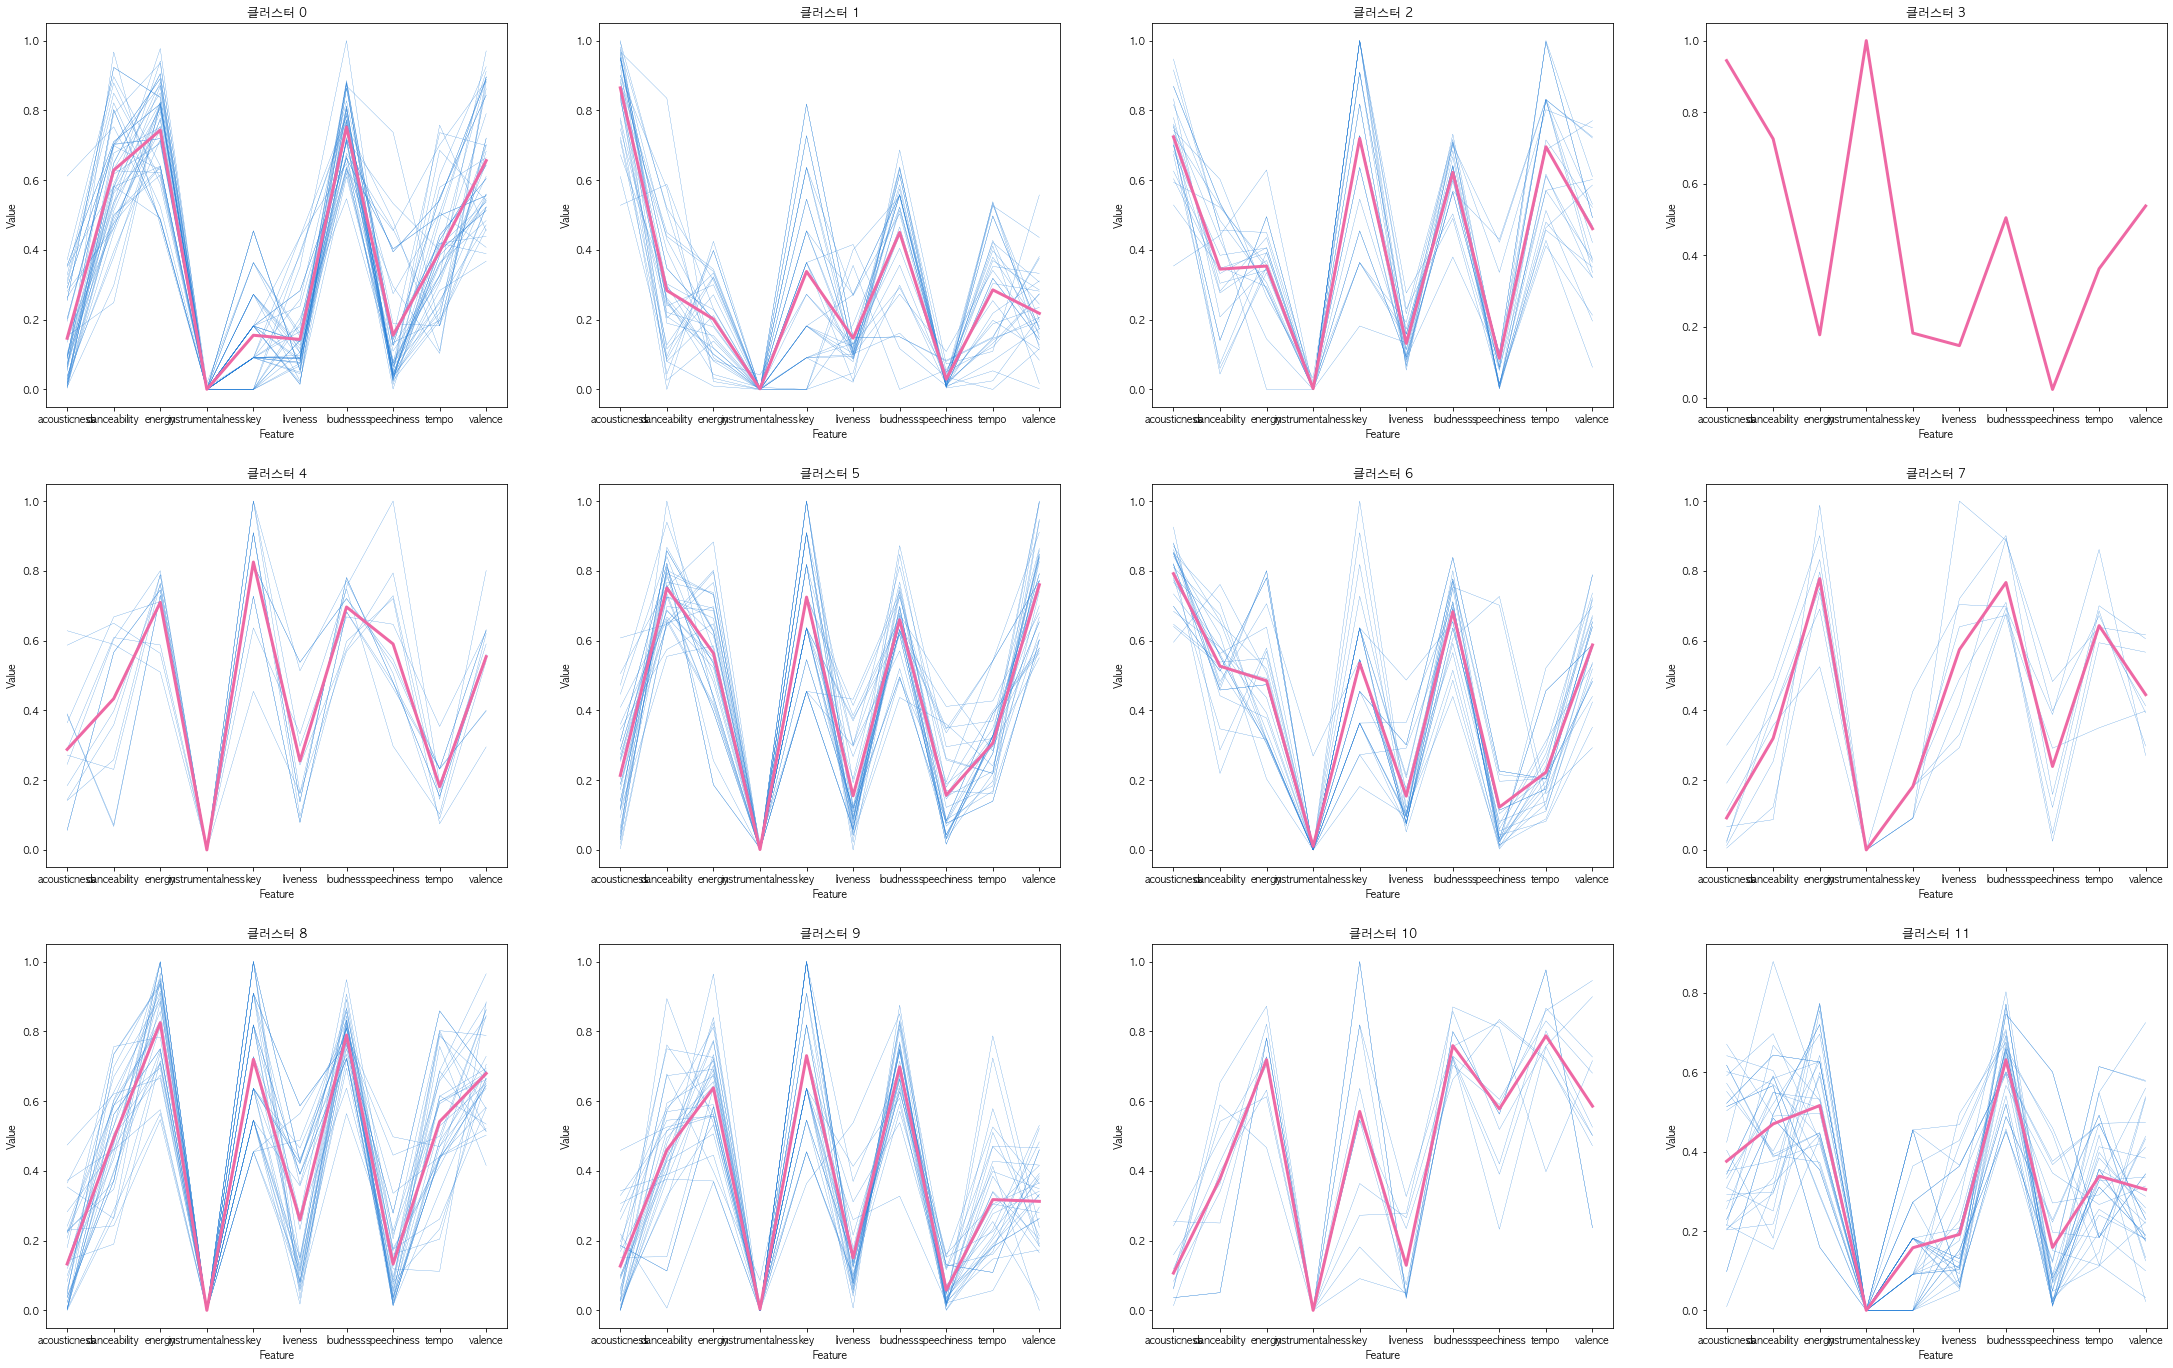

In [4]:
observer.run()
Demo2._clear()
observer.kmeans.draw_cluster()

## 3. SeedZone KMeans Sorting & Save

### 새로운 SeedZone 클러스터링 정보 <u>62964553ed895b6b103f6e55</u>가 등록 되었습니다.

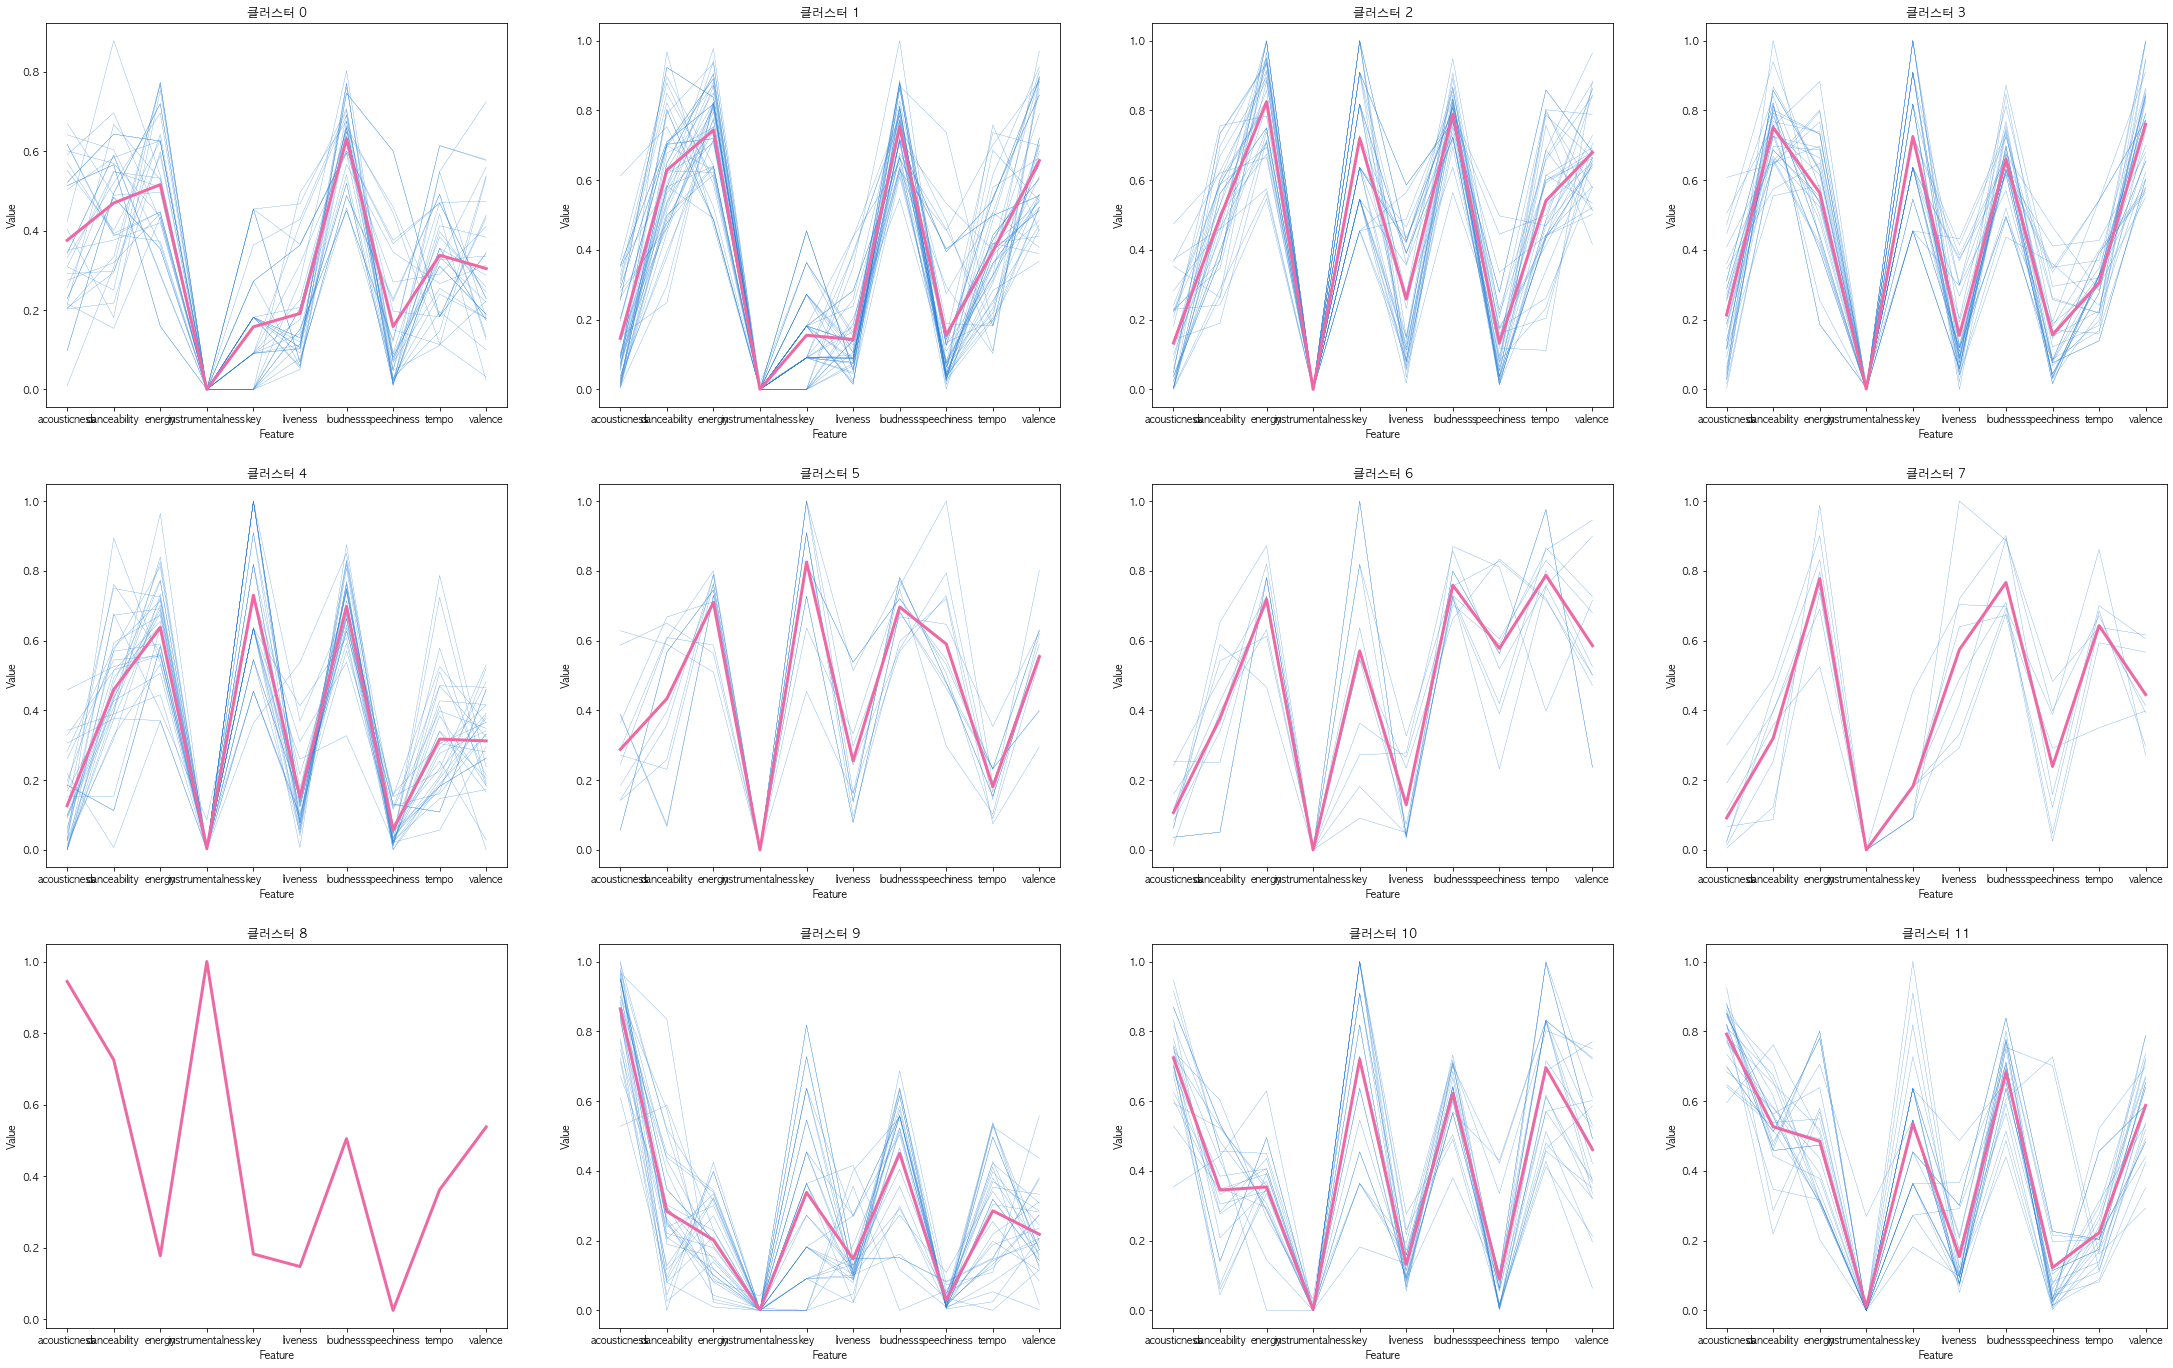

In [5]:
observer.sorting()
Demo2._clear()

observer.save()

Demo2.so_pt3(observer)
observer.kmeans.draw_cluster()

# 2. CoordGenerator

### SeedZone Observer가 생성한 최신 정보의 클러스터링 결과를 토대로 우체통에 좌표 부여

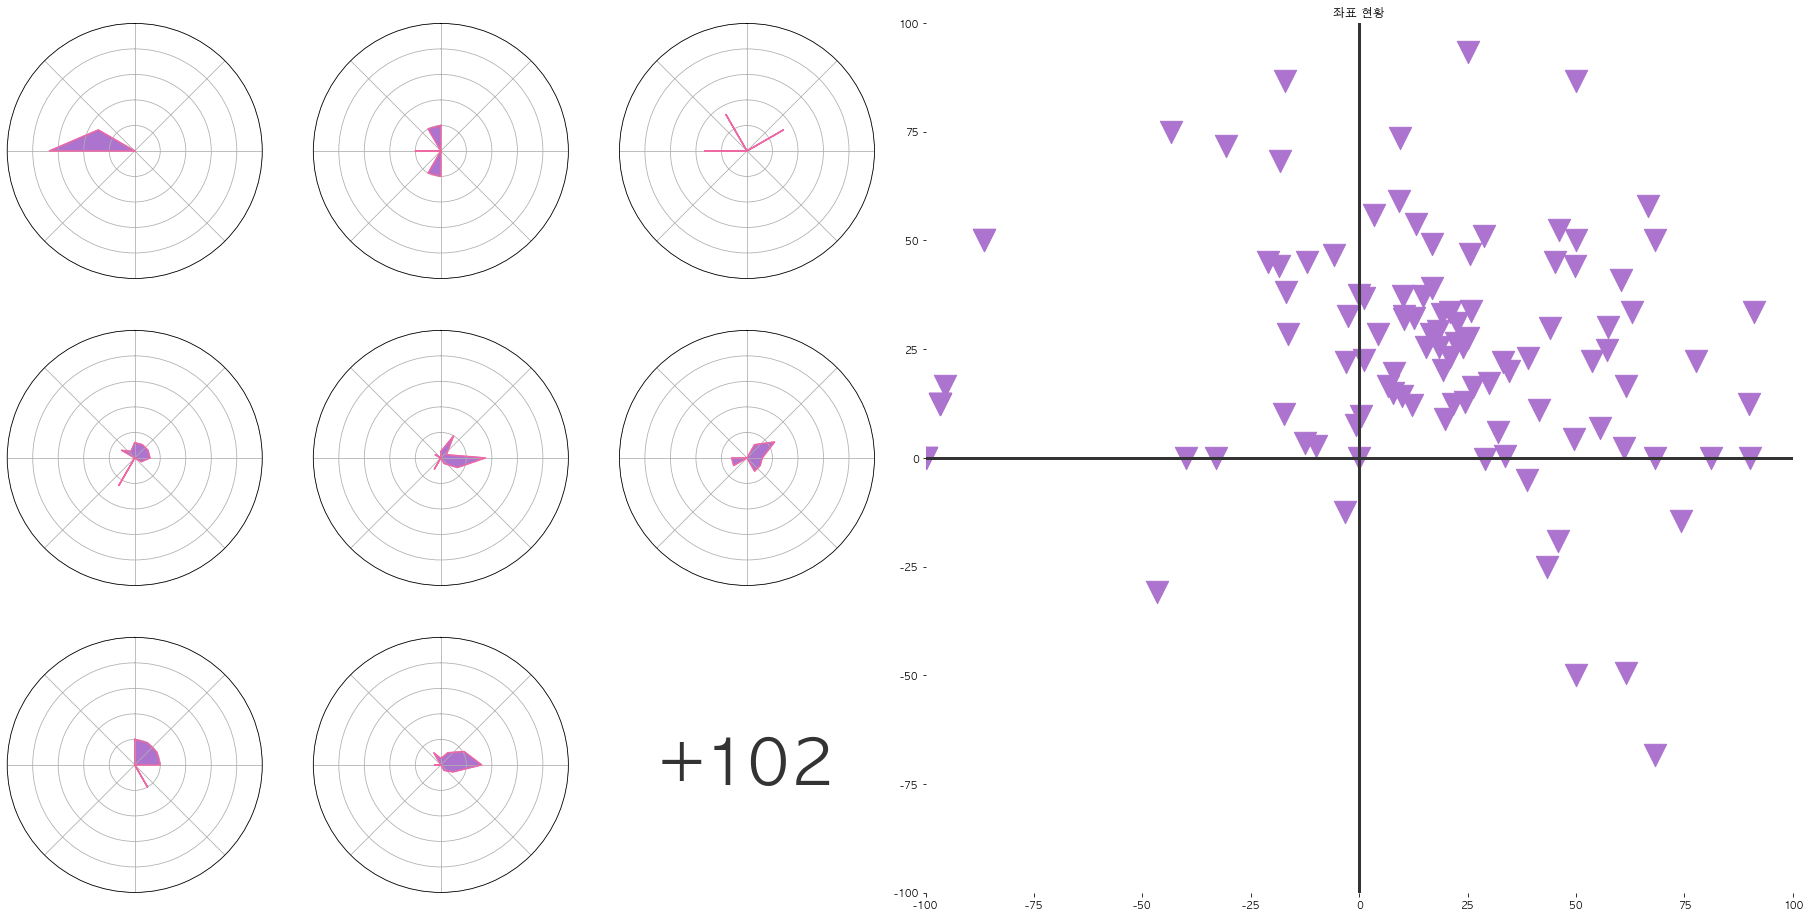

In [6]:
CoordGenerator.all_make_coords()
CoordGenerator.draw_radar_map()

## 1. 반경 내 외 테스트

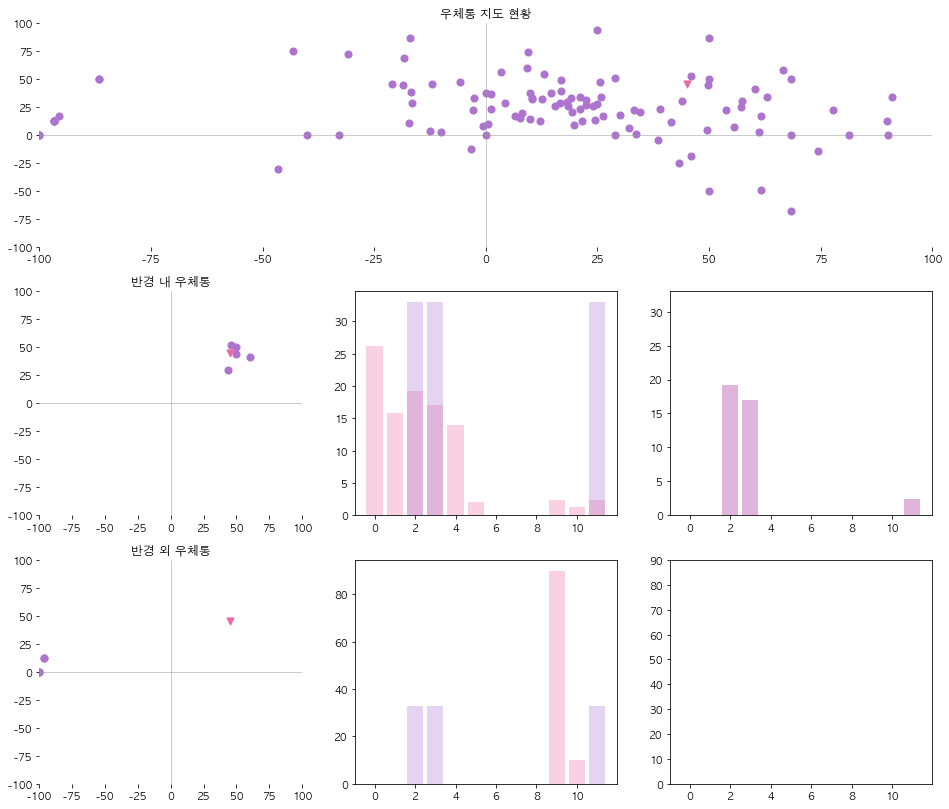

In [7]:
ran_mailbox = DB().random_mailbox()
gen = CoordGenerator(str(ran_mailbox['_id']))

gen.make_coords()
gen.radar_test()